<a href="https://colab.research.google.com/github/TariqAlhathloul/Time-Series-Forecasting-Project/blob/main/WorkSpace/traffic_Counts_GRU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Description: This dataset includes real-time and historical traffic congestion data from Chicago, including traffic flow, speed, and incident reports. It's valuable for studying traffic patterns in urban environments.

## Dataset Overview

#### 1. `ID`: A unique identifier for each traffic count record.

#### 2. `Traffic Volume Count Location Address`: The address where the traffic volume was recorded.

#### 3. `Street`: The street name where the traffic count was taken.

#### 4. `Date of Count`: The date on which the traffic count was recorded.

#### 5. `Total Passing Vehicle Volume`: The total number of vehicles that passed the location during the count period.

#### 6. ` Vehicle Volume By Each Direction of Traffic`: The vehicle count divided by direction (e.g., East Bound, West Bound).

#### 7. `Latitude`: The latitude coordinate of the traffic count location.

#### 8. `Longitude`: The longitude coordinate of the traffic count location.

#### 9. `Location`: The geographic location as a tuple of latitude and longitude.

Check out the [City of Chicago Traffic Data](https://www.chicago.gov/city/en/depts/cdot/dataset/average_daily_trafficcounts.html) for more information.


[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/username/repository/blob/main/notebook.ipynb)

## import libraries

In [42]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense, Dropout, GRU, Bidirectional
from keras.optimizers import SGD

import math
from sklearn.metrics import mean_squared_error

## Load the data

In [43]:
df_traffic = pd.read_csv('/content/Average_Daily_Traffic_Counts_-_2006.csv')

### Change the datatype of the `Date of Count` from object to datetime.
### drop`ID` and `Location`.
### Set new column `Date` as index.
### sort the values in the dataframe based on the `date`.

In [44]:
df_traffic['Date'] = pd.to_datetime(df_traffic['Date of Count'], format='%m/%d/%Y')
df_traffic.drop(columns=['ID ', 'Location'], axis=1, inplace=True)
df_traffic.set_index('Date', inplace=True)
df_traffic = df_traffic.sort_values(by='Date')
df = df_traffic.copy()


In [45]:
df.head()

,Traffic Volume Count Location Address,Street,Date of Count,Total Passing Vehicle Volume,Vehicle Volume By Each Direction of Traffic,Latitude,Longitude
Date,,,,,,,
2006-02-01,6820 South,Cottage Grove Ave,02/01/2006,21700,North Bound: 10300 / South Bound: 11400,41.770685,-87.605711
2006-02-01,5325 South,Cottage Grove Ave,02/01/2006,13700,North Bound: 7200 / South Bound: 6500,41.797881,-87.606302
2006-02-28,758 West,71st Street,02/28/2006,21600,East Bound: 10400 / West Bound: 11200,41.765204,-87.644371
2006-02-28,7718 South,Dr Martin Luther King Jr Dr,02/28/2006,16700,North Bound: 7900 / South Bound: 8800,41.754187,-87.615027
2006-02-28,1275 West,71st Street,02/28/2006,16500,East Bound: 7800 / West Bound: 8700,41.765008,-87.657067


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1279 entries, 2006-02-01 to 2007-06-19
Data columns (total 7 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Traffic Volume Count Location  Address       1279 non-null   object 
 1   Street                                       1279 non-null   object 
 2   Date of Count                                1279 non-null   object 
 3   Total Passing Vehicle Volume                 1279 non-null   int64  
 4   Vehicle Volume By Each Direction of Traffic  1279 non-null   object 
 5   Latitude                                     1279 non-null   float64
 6   Longitude                                    1279 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 79.9+ KB


In [47]:
traffic_volume = df[['Total Passing Vehicle Volume']].values

## Preporcessing the data

In [48]:
min_max = MinMaxScaler(feature_range=(0, 1))
traffic_volume = min_max.fit_transform(traffic_volume)

In [49]:
def create_sequences(data, sequence_len):
  X, Y = [], []

  for i in range(sequence_len, len(data)):
    X.append(data[i - sequence_len: i, 0])
    Y.append(data[i, 0])

  return np.array(X), np.array(Y)

In [50]:
seq_len = 30

x, y = create_sequences(traffic_volume, seq_len)

In [51]:
train_size = int(len(x) * 0.8)

X_train, X_test = x[:train_size], x[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [52]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [53]:
X_train.shape[1]

30

## Modeling

In [54]:
modelGRU = Sequential()

modelGRU.add(GRU(units=32, return_sequences=True, input_shape=(X_train.shape[1], 1), activation='tanh'))
modelGRU.add(Dropout(0.2))

modelGRU.add(GRU(units=32, activation='tanh'))
modelGRU.add(Dropout(0.2))

modelGRU.add(Dense(units=1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


## Model summary

In [55]:
modelGRU.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_2 (GRU)                          │ (None, 30, 32)              │           3,360 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 30, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_3 (GRU)                          │ (None, 32)                  │           6,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,729 (38.00 KB)

 Trainable params: 9,729 (38.00 KB)

 Non-trainable params: 0 (0.00 B)

## Compile

In [56]:
modelGRU.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9, nesterov=False),loss='mean_squared_error')

## callbacks

In [57]:
call_backs = (
    keras.callbacks.EarlyStopping(monitor='loss', patience=10),
    keras.callbacks.ModelCheckpoint('Models/GRU_Model.keras', save_best_only=True)
)

## fitting the GRU model

In [58]:
history = modelGRU.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0097
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0056
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 0.0060
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0068
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0065
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0060
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0066
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0060
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0052
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.0049
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 0.0066
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0052
Epoch 13/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0054
Epoch 14/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0063
Epoch 15/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - lo

## Predications

In [59]:
predications = modelGRU.predict(X_test)
predications = min_max.inverse_transform(predications.reshape(-1, 1))

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step


In [60]:
y_true = min_max.inverse_transform(y_test.reshape(-1, 1))

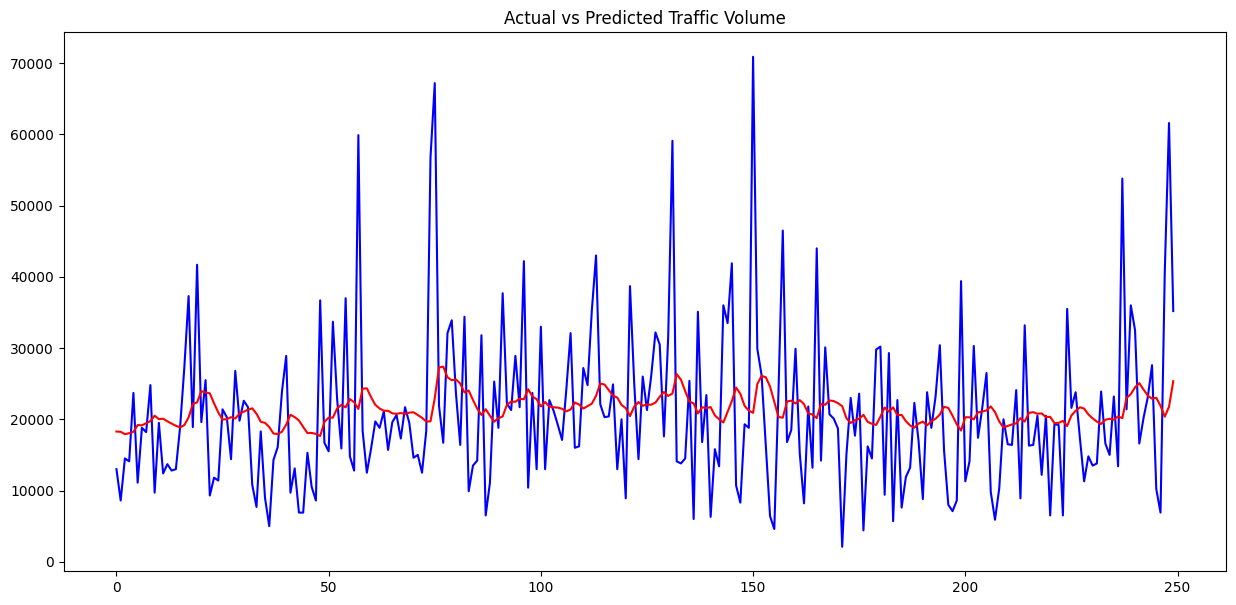

In [61]:
plt.figure(figsize=(15, 7))

plt.plot(y_true, color='blue', label='Actual Traffic Volume')
plt.plot(predications, color='red', label='Predicted Traffic Volume')

plt.title('Actual vs Predicted Traffic Volume')

plt.show()